In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Parsing ICL

In [6]:
dataset='sst2'
model_name='meta-llama/Llama-2-7b-hf'

results_path = f'./checkpoints/{dataset}/{model_name}/textfooler/'

attacks = ['textfooler']
seeds = [1, 13, 42]
shots = [4, 8, 16, 32]
results = []

for seed in seeds:
    for attack in attacks:
        for shot in shots:
            file = f'{results_path}icl-seed-{seed}-shot-{shot}/logs_{attack}.txt'
            if os.path.isfile(file):
                with open(file) as f:
                    lines = f.readlines()
                    result = {'seed': seed, 'shot': shot, 'attack': attack, 'method': 'icl'}
                    for line in lines:
                        if 'Original accuracy:' in line:
                            result['Clean Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Accuracy under attack:' in line:
                            result['Attack Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Attack success rate:' in line:
                            result['ASR'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Average perturbed word %:' in line:
                            result['Perturbed Word Ratio'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Average Attack Perplexity:' in line:
                            result['Attack Perplexity'] = float(line.split(':')[1].strip().strip('| '))

                    results.append(result)

In [7]:
pd.DataFrame(results)

,seed,shot,attack,method,Clean Acc,Attack Acc,ASR,Perturbed Word Ratio,Attack Perplexity
0,1,4,textfooler,icl,NaN,NaN,NaN,NaN,NaN
1,1,8,textfooler,icl,NaN,NaN,NaN,NaN,NaN
2,1,16,textfooler,icl,NaN,NaN,NaN,NaN,NaN
3,1,32,textfooler,icl,NaN,NaN,NaN,NaN,NaN
4,13,4,textfooler,icl,70.07,40.14,42.72,10.85,94.38
5,13,8,textfooler,icl,88.19,45.64,48.24,12.48,103.58
6,13,16,textfooler,icl,51.95,48.17,7.28,8.12,77.24
7,13,32,textfooler,icl,NaN,NaN,NaN,NaN,NaN
8,42,16,textfooler,icl,NaN,NaN,NaN,NaN,NaN
9,42,32,textfooler,icl,NaN,NaN,NaN,NaN,NaN


### Parsing kNN-ICL

In [14]:
dataset='sst2'
model_name='meta-llama/Llama-2-7b-hf'

results_path = f'./checkpoints/{dataset}/{model_name}/textfooler/'

attacks = ['textfooler']
seeds = [1, 13, 42]
shots = [4, 8, 16, 32]
results = []

for seed in seeds:
    for attack in attacks:
        for shot in shots:
            file = f'{results_path}knn_icl-seed-{seed}-shot-{shot}/final/logs_{attack}.txt'
            if os.path.isfile(file):
                with open(file) as f:
                    lines = f.readlines()
                    result = {'seed': seed, 'shot': shot, 'attack': attack}
                    for line in lines:
                        if 'Original accuracy:' in line:
                            result['Clean Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Accuracy under attack:' in line:
                            result['Attack Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Attack success rate:' in line:
                            result['ASR'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Average perturbed word %:' in line:
                            result['Perturbed Word Ratio'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Average Attack Perplexity:' in line:
                            result['Attack Perplexity'] = float(line.split(':')[1].strip().strip('| '))

                    results.append(result)

In [18]:
knn_df = pd.DataFrame(results)
# compute the mean and std for Clean Acc, Attack Acc, ASR, Perturbed Word Ratio, Attack Perplexity for knn_df
knn_df_mean = knn_df.groupby(['shot', 'attack']).mean().round(2)
knn_df_std = knn_df.groupby(['shot', 'attack']).std().round(2)

# combine the mean and std into a single dataframe with plus minus sign
knn_df_mean_std = knn_df_mean.astype(str) + ' ± ' + knn_df_std.astype(str)
knn_df_mean_std

,,seed,Clean Acc,Attack Acc,ASR,Perturbed Word Ratio,Attack Perplexity
shot,attack,,,,,,
4,textfooler,18.67 ± 21.08,73.55 ± 12.21,27.45 ± 17.18,64.79 ± 19.05,8.35 ± 0.54,81.96 ± 1.18
8,textfooler,18.67 ± 21.08,65.17 ± 2.67,13.91 ± 8.53,78.52 ± 13.53,10.65 ± 0.21,92.54 ± 4.81
16,textfooler,18.67 ± 21.08,79.63 ± 13.14,24.23 ± 16.53,71.28 ± 17.49,11.3 ± 1.19,102.85 ± 7.59
32,textfooler,18.67 ± 21.08,86.92 ± 3.97,29.78 ± 4.6,65.85 ± 3.82,11.78 ± 0.52,104.08 ± 4.23


In [8]:
!ls

None	     configs	    logs       result_parsing.ipynb  run_train_sst5.sh
README.md    customattacks  main.py    run_test.sh	     scripts
analysis     data	    mvp.png    run_train.sh	     src
checkpoints  downloader.sh  nohup.out  run_train_gpu2.sh


### Parsing Swap Labels

In [11]:
dataset='rte'
model_name='meta-llama/Llama-2-7b-hf'

results_path = f'./checkpoints/{dataset}/{model_name}/swap_labels/'

attacks = ['swap_labels']
seeds = [1, 13, 42]
shots = [2, 4, 8, 16]
results = []

for seed in seeds:
    for attack in attacks:
        for shot in shots:
            file = f'{results_path}icl_attack-seed-{seed}-shot-{shot}/logs_{attack}_quantized_bound.txt'
            if os.path.isfile(file):
                with open(file) as f:
                    lines = f.readlines()
                    result = {'seed': seed, 'shot': shot, 'attack': attack}
                    for line in lines:
                        if 'Original accuracy:' in line:
                            result['Clean Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Accuracy under attack:' in line:
                            result['Attack Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Attack success rate:' in line:
                            result['ASR'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Average perturbed word %:' in line:
                            result['Perturbed Word Ratio'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                        elif 'Average Attack Perplexity:' in line:
                            result['Attack Perplexity'] = float(line.split(':')[1].strip().strip('| '))
            
                    results.append(result)
            else:
                print(file)

./checkpoints/rte/meta-llama/Llama-2-7b-hf/swap_labels/icl_attack-seed-42-shot-16/logs_swap_labels_quantized_bound.txt


In [14]:
icl_df = pd.DataFrame(results)

In [15]:
# Compute the mean and std for Clean Acc, Attack Acc, ASR, Perturbed Word Ratio, Attack Perplexity for icl_df

icl_df_mean = icl_df.groupby(['shot', 'attack']).mean().round(2)
icl_df_std = icl_df.groupby(['shot', 'attack']).std().round(2)

# combine the mean and std into a single dataframe with plus minus sign
icl_df_mean_std = icl_df_mean.astype(str) + ' ± ' + icl_df_std.astype(str)
icl_df_mean_std

,,seed,Clean Acc,Attack Acc,ASR,Perturbed Word Ratio,Attack Perplexity
shot,attack,,,,,,
2,swap_labels,18.67 ± 21.08,66.55 ± 6.86,22.38 ± 9.81,66.76 ± 12.12,0.8 ± 0.04,2.68 ± 0.18
4,swap_labels,18.67 ± 21.08,69.31 ± 2.6,13.12 ± 5.11,81.1 ± 7.27,0.61 ± 0.16,3.13 ± 2.02
8,swap_labels,18.67 ± 21.08,71.84 ± 0.72,4.57 ± 0.91,93.64 ± 1.23,0.34 ± 0.03,32.56 ± 6.29
16,swap_labels,7.0 ± 8.49,73.65 ± nan,3.25 ± nan,95.59 ± nan,0.19 ± nan,33.97 ± nan


### kNN Analysis

In [11]:
dataset='sst2'
model_name='meta-llama/Llama-2-7b-hf'

results_path = f'./checkpoints/{dataset}/{model_name}/textfooler/'

# attacks = ['textbugger', 'textfooler']
attacks = ['textfooler']
ks = [1, 3, 7, 15, 31, 63, 127, 255, 511]
results = []
for seed in [1]:
    for shot in [16, 32, 64, 128, 256, 512]:
        for k in [x for x in ks if x < shot]:
            for attack in attacks:
                try:
                    file = f'{results_path}knn_icl-seed-{seed}-shot-{shot}/example-k-{k}/logs_{attack}_test.txt'
                    if os.path.isfile(file) == False:
                        file = f'{results_path}knn_icl-seed-{seed}-shot-{shot}/example-k-{k}/logs_{attack}_0.15_test.txt'
                    """
                    locate and parse the following in the file 
                    +-------------------------------+--------+
| Attack Results                |        |
+-------------------------------+--------+
| Number of successful attacks: | 534    |
| Number of failed attacks:     | 178    |
| Number of skipped attacks:    | 160    |
| Original accuracy:            | 81.65% |
| Accuracy under attack:        | 20.41% |
| Attack success rate:          | 75.0%  |
| Average perturbed word %:     | 8.36%  |
| Average num. words per input: | 17.4   |
| Avg num queries:              | 74.37  |
| Adv confidence:               | 1.0    |
| Average Original Perplexity:  | 61.62  |
| Average Attack Perplexity:    | 86.19  |
| Average Attack USE Score:     | 0.88   |
+-------------------------------+--------+
                    """ 
                    with open(file, 'r') as f:
                        lines = f.readlines()
                except:
                    print(f'file {file} not found')
                    continue

                result = {'seed': seed, 'shot': shot, 'k': k, 'attack': attack}
                for line in lines:
                    if 'Original accuracy:' in line:
                        result['Clean Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                    elif 'Accuracy under attack:' in line:
                        result['Attack Acc'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                    elif 'Attack success rate:' in line:
                        result['ASR'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                    elif 'Average perturbed word %:' in line:
                        result['Perturbed Word Ratio'] = float(line.split(':')[1].strip().replace('%', '').strip('| '))
                    elif 'Average Attack Perplexity:' in line:
                        result['Attack Perplexity'] = float(line.split(':')[1].strip().strip('| '))

                results.append(result)


file ./checkpoints/sst2/meta-llama/Llama-2-7b-hf/textfooler/knn_icl-seed-1-shot-512/example-k-1/logs_textfooler_0.15_test.txt not found
file ./checkpoints/sst2/meta-llama/Llama-2-7b-hf/textfooler/knn_icl-seed-1-shot-512/example-k-3/logs_textfooler_0.15_test.txt not found
file ./checkpoints/sst2/meta-llama/Llama-2-7b-hf/textfooler/knn_icl-seed-1-shot-512/example-k-7/logs_textfooler_0.15_test.txt not found
file ./checkpoints/sst2/meta-llama/Llama-2-7b-hf/textfooler/knn_icl-seed-1-shot-512/example-k-15/logs_textfooler_0.15_test.txt not found
file ./checkpoints/sst2/meta-llama/Llama-2-7b-hf/textfooler/knn_icl-seed-1-shot-512/example-k-31/logs_textfooler_0.15_test.txt not found
file ./checkpoints/sst2/meta-llama/Llama-2-7b-hf/textfooler/knn_icl-seed-1-shot-512/example-k-63/logs_textfooler_0.15_test.txt not found
file ./checkpoints/sst2/meta-llama/Llama-2-7b-hf/textfooler/knn_icl-seed-1-shot-512/example-k-127/logs_textfooler_0.15_test.txt not found
file ./checkpoints/sst2/meta-llama/Llama-2-

In [12]:
df = pd.DataFrame(results)
df.head()

,seed,shot,k,attack,Clean Acc,Attack Acc,ASR,Perturbed Word Ratio,Attack Perplexity
0,1,16,1,textfooler,77.75,26.61,65.78,8.79,88.62
1,1,16,3,textfooler,84.40,23.74,71.88,11.08,101.26
2,1,16,7,textfooler,87.16,26.03,70.13,11.86,104.43
3,1,16,15,textfooler,87.04,26.03,70.09,12.02,107.89
4,1,32,1,textfooler,81.42,33.60,58.73,7.95,84.58


In [13]:
df.to_csv(f'{results_path}results.csv', index=False)

/tmp/ipykernel_87737/524646785.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=textfooler, x='k', y='Perturbed Word Ratio', hue='shot', palette=color_palette, ci=None, linewidth=2)
/tmp/ipykernel_87737/524646785.py:21: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(data=textfooler, x='k', y='Perturbed Word Ratio', hue='shot', palette=color_palette, ci=None, linewidth=2)


,shot,k,Perturbed Word Ratio
0,16,1,8.79
1,16,3,11.08
2,16,7,11.86
3,16,15,12.02
4,32,1,7.95


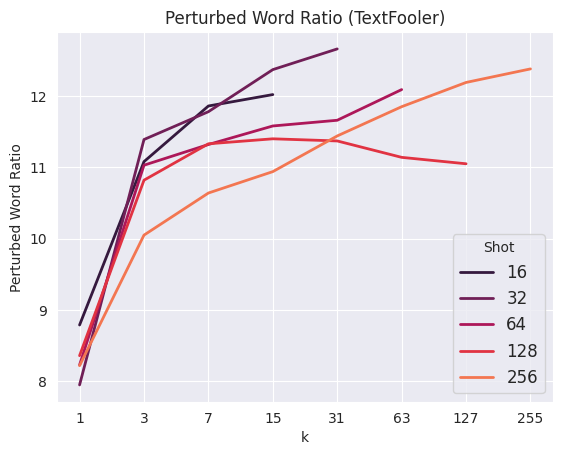

In [8]:
textfooler = df[df['attack'] == 'textfooler']

textfooler = textfooler[['shot', 'k', 'Perturbed Word Ratio']]
# keep unique row
textfooler = textfooler.drop_duplicates()

ks = [1, 3, 7, 15, 31, 63, 127, 255]
# make k as string and categorical
textfooler['k'] = textfooler['k'].astype(str)
textfooler['k'] = textfooler['k'].astype('category')

color_palette = ['#311A3C', '#672555', '#9F2958', '#CF4448', '#E37D5A', '#ECB795']
color_palette = sns.color_palette("rocket")
# sort the k column
textfooler['k'] = textfooler['k'].cat.reorder_categories([str(k) for k in ks], ordered=True)
# plot line graph with k as the x-axis, Clean Acc as the y-axis and shot as the hue

# grid
sns.set_style("darkgrid")

sns.lineplot(data=textfooler, x='k', y='Perturbed Word Ratio', hue='shot', palette=color_palette, ci=None, linewidth=2)
# legend
plt.legend(loc='lower right', title='Shot', fontsize=12)
# title "Clean Acc vs k"
plt.title('Perturbed Word Ratio (TextFooler)')
# rescale x-axis as categorical

textfooler.head()

/tmp/ipykernel_87737/3170833257.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=textfooler, x='k', y='Attack Perplexity', hue='shot', palette=color_palette, ci=None, linewidth=2)
/tmp/ipykernel_87737/3170833257.py:21: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(data=textfooler, x='k', y='Attack Perplexity', hue='shot', palette=color_palette, ci=None, linewidth=2)


,shot,k,Attack Perplexity
0,16,1,88.62
1,16,3,101.26
2,16,7,104.43
3,16,15,107.89
4,32,1,84.58


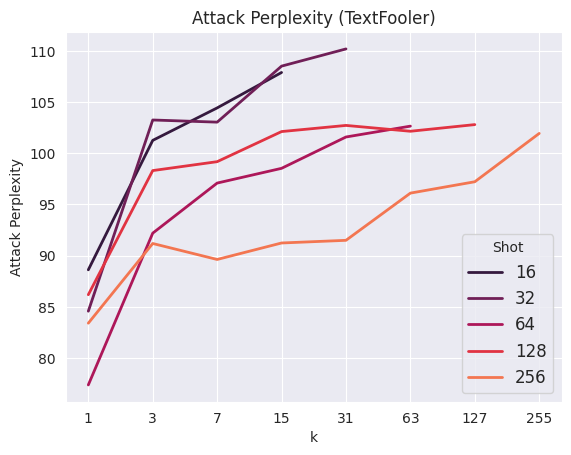

In [14]:
textfooler = df[df['attack'] == 'textfooler']

textfooler = textfooler[['shot', 'k', 'Attack Perplexity']]
# keep unique row
textfooler = textfooler.drop_duplicates()

ks = [1, 3, 7, 15, 31, 63, 127, 255]
# make k as string and categorical
textfooler['k'] = textfooler['k'].astype(str)
textfooler['k'] = textfooler['k'].astype('category')

color_palette = ['#311A3C', '#672555', '#9F2958', '#CF4448', '#E37D5A', '#ECB795']
color_palette = sns.color_palette("rocket")
# sort the k column
textfooler['k'] = textfooler['k'].cat.reorder_categories([str(k) for k in ks], ordered=True)
# plot line graph with k as the x-axis, Clean Acc as the y-axis and shot as the hue

# grid
sns.set_style("darkgrid")

sns.lineplot(data=textfooler, x='k', y='Attack Perplexity', hue='shot', palette=color_palette, ci=None, linewidth=2)
# legend
plt.legend(loc='lower right', title='Shot', fontsize=12)
# title "Clean Acc vs k"
plt.title('Attack Perplexity (TextFooler)')
# rescale x-axis as categorical

textfooler.head()